# Summary comparison of composite strategies 

In the prior steps, we have explored and optimised the best parameter for each of the composite strategy types. In this analysis, the results of the best of each composite strategy type will be compared, including the benchmark strategy itself. 

To be more specific, we will analyse the following strategy types:
- `Primary`: Primary oscillator trade signals
- `Filter 1`: Filter 1 signals
- `Filter 1 + 2`: Filter 1 and 2 signals which forms our __benchmark strategy__
- `Moving Average (MA)`
- `Moving Average with Moving Average Convergence Divergence (MA-MACD)`
- `Exponentially Weighted Moving Average (EWMA)`
- `Exponentially Weighted Moving Average with Moving Average Convergence Divergence (EWMA-MACD)`
- `Relative Strength Index (RSI)`

The descriptive statistics of each strategy type was also calculated as listed:
- Average annualised return metric
- Standard deviation of the annualised return metric across 21 years
- Average annualised return per unit of standard deviation risk (reward-to-risk)
- Filter trade signal counts
- Average portfolio cumulative return (based on equal stock weightage)
- Average holding time in days per trade signal 

We created a custom function called `plot_charts` which is intended for plotting specific graphs based on the abovementioned descriptive statistics.

In the following sections, the results for both Buy/Long and Sell/Short trades will be discussed with relevant plots. In addition, recommendations of the best composite strategy will be provided.

## 1. Buy Only (Long) Trade Signals

We start off by taking a look at the summarised results for the Buy trade signals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sb
from plot_charts import plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory_path = '../strategy_calculation/Output_strategy_statistics/'
files_list = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]
master_df = pd.concat([pd.read_csv(directory_path + f, index_col=0) for f in files_list])

In [3]:
# The following code is used to filter out the type of strategy (buy/sell) for the respective filter
store_names = []
for i in files_list:
    try:
        df = pd.read_csv(directory_path + i, index_col=0)
        x = df.index.values
        store_names.append([x, i])
    except:
        pass
  
# Store the file name in final_names list
final_names = []
for i in store_names:
    for j in i[0]:
        final_names.append([j, i[1]])    
        
temp_df = pd.DataFrame(final_names)
temp_df.index = temp_df[0]
temp_df = temp_df[[1]]

# Extract buy/sell names in a list
sig = []
for strat in temp_df[1]:
    if 'buy' in strat:
        sig.append('buy')
    elif 'sell' in strat:
        sig.append('sell')
    else:
        sig.append('primary')

In [4]:
# Insert the buy/sell names into a DataFrame column
master_df = master_df.reset_index()
master_df['sig'] = pd.DataFrame(sig)
master_df = master_df.set_index('index', drop=True)

In [5]:
# Separate buy and sels signals
buy = master_df[(master_df.sig == 'buy')]
sell = master_df[(master_df.sig == 'sell')]


# Reorder the values in an intuitive format 
buy_list = ['Primary', 'Filter1', 'Filter1+Filter2',
            'EWMA(26/13)', 'MA(28/13)', 'EWMA(12/13)_MACD(5,35,5)', 'MA(10/13)_MACD(5,35,5)',
            'RSI(83/13)']

sell_list = ['Primary', 'Filter1', 'Filter1+Filter2', 
             'EWMA(34/13)', 'MA(13/13)', 'EWMA(15/13)_MACD(8,17,9)', 'MA(6/13)_MACD(8,17,9)',
             'RSI(84/13)']

buy = buy.loc[buy_list]
sell = sell.loc[sell_list]

#### 1.1 Average Annualised Return and Risk Adjusted Ratio (Average Return/Standard Deviation) 

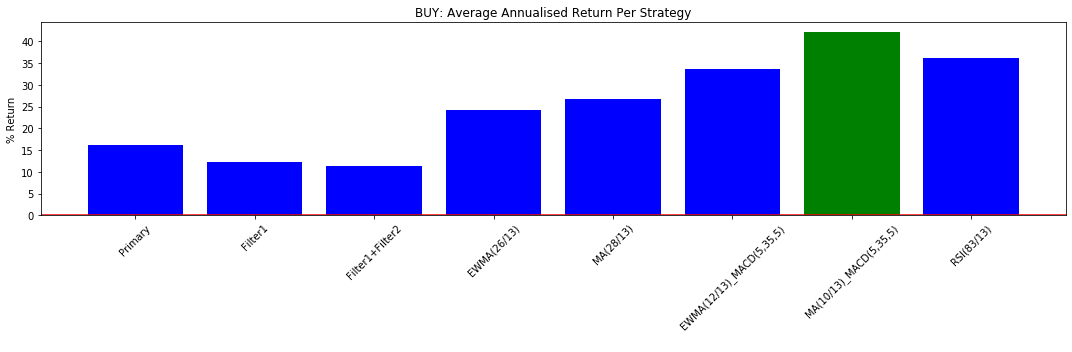

In [6]:
plots(buy, signal_type='buy', stat='return')

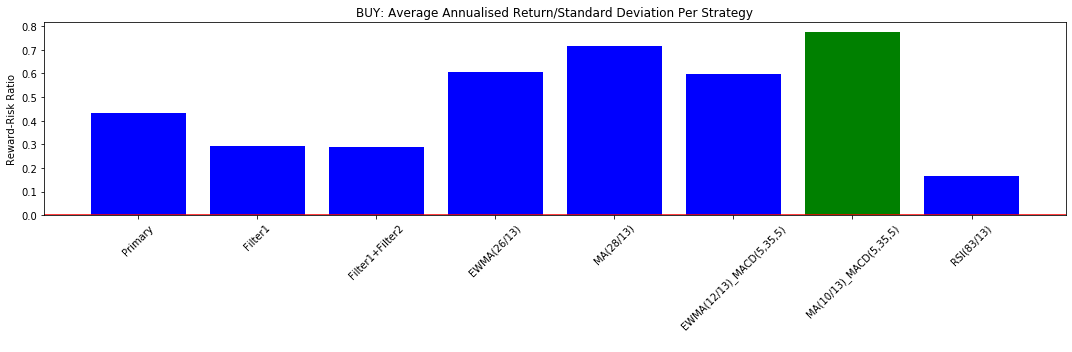

In [7]:
plots(buy, signal_type='buy', stat='return_std')

The plots above show that the filter of `MA(10/13)+MACD(5,35,5)` provides the highest average annualised return and highest risk-adjusted average annualised return (return/standard deviation). 

#### 1.2 Average Holding Time in Days

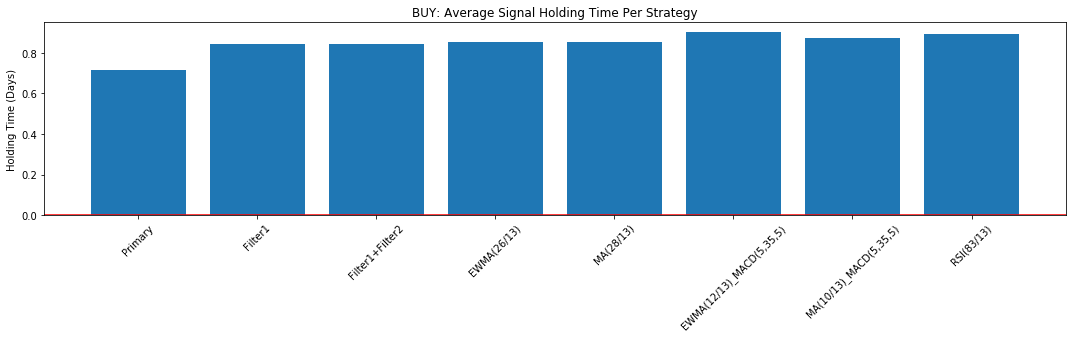

In [8]:
plots(buy,signal_type='buy', stat='holding_time')

This bar plot shows that most of the strategies have an average holding time of 0.8 days. The `EWMA(12/13 day)+MACD(5,35,5)` composite strategy has the longest average holding time per trade signal.

#### 1.3 Strategy Filtered Signal Counts with Average Portfolio Cumulative Return   

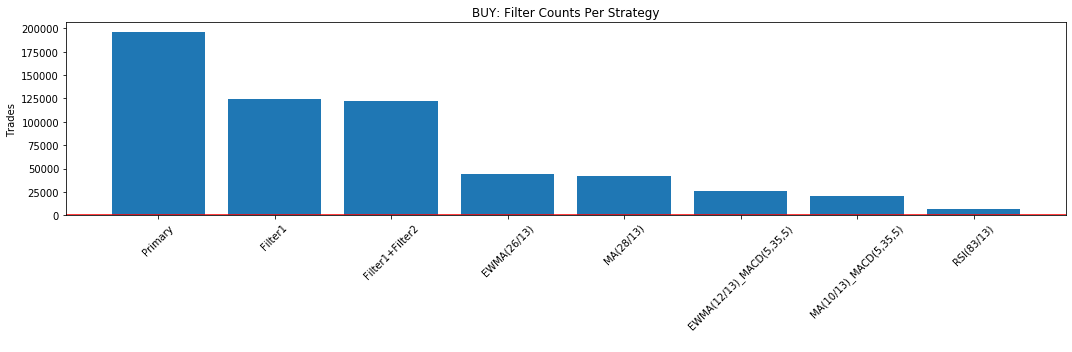

In [9]:
plots(buy,signal_type='buy', stat='counts')

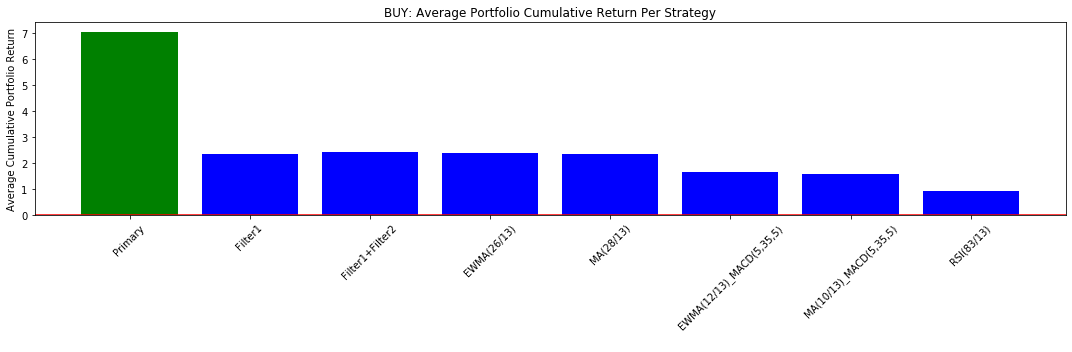

In [10]:
plots(buy,signal_type='buy', stat='cumulative')

From the plots of filtered count and average portfolio cumulative return, we observe that the strategies with high filtered signal counts tend to have the higher cumulative return. However, comparing against the benchmark strategy (Filter 1 + 2), the other composite strategies have similar returns despite having significantly lower filtered signal counts. This shows that the various composite strategies have greater improvement in terms of the average returns.

## 2. Sell Only (Short) Trade Signals

#### 2.1 Average Annualised Return and Risk Adjusted Ratio (Average Return/Standard Deviation) 

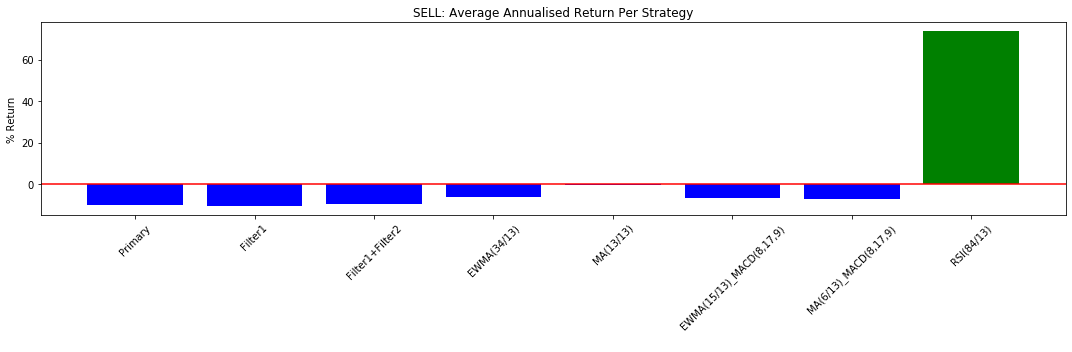

In [11]:
plots(sell, signal_type='sell', stat="return")

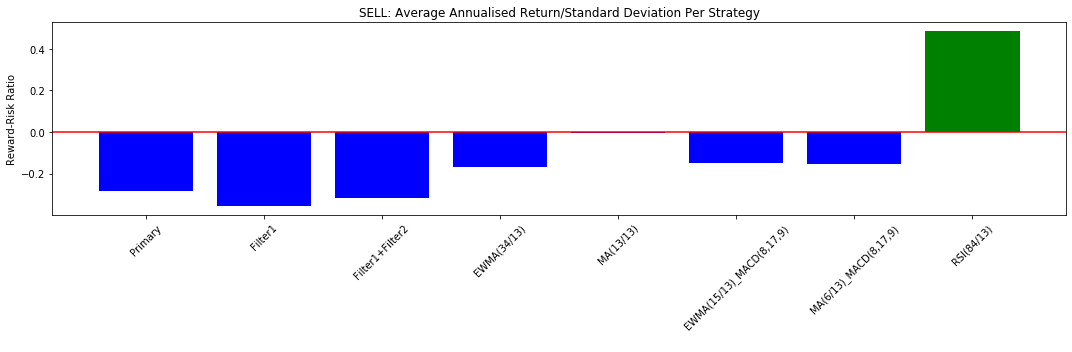

In [12]:
plots(sell, signal_type='sell', stat="return_std")

For sell-only trade signals, the plots above shows that RSI with window size 84/13 days has a remarkablely high annualised return, and it also has highest return/standard deviation ratio. It is also the only strategy that has a positive annualised return among all strategies (including the benchmark).

#### 2.2 Average Holding Time in Days

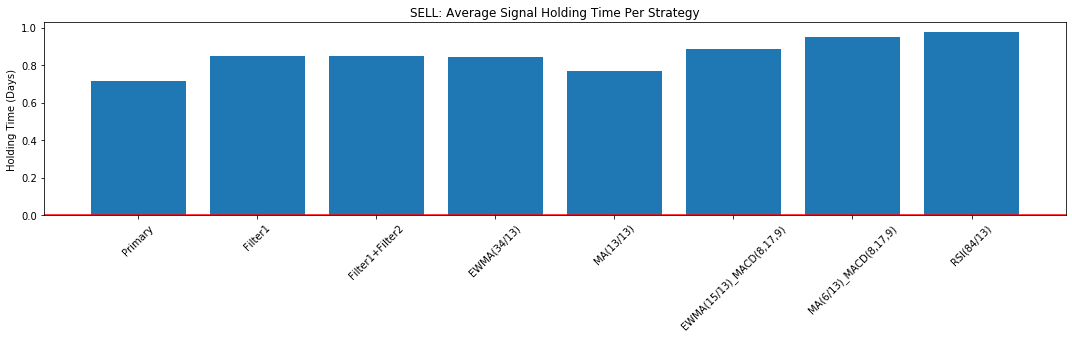

In [13]:
plots(sell, signal_type='sell',stat="holding_time")

This bar plot shows that most of the strategies have an average holding time of 0.9 days. The `RSI(84/13)` composite strategy has the longest holding time of around 0.95 days.

#### 2.3 Strategy Filtered Signal Counts with Average Portfolio Cumulative Return   

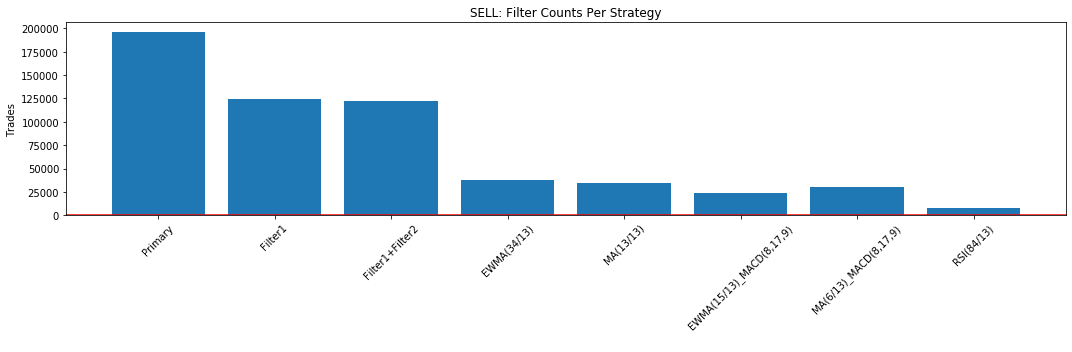

In [14]:
plots(sell, signal_type='sell', stat="counts")

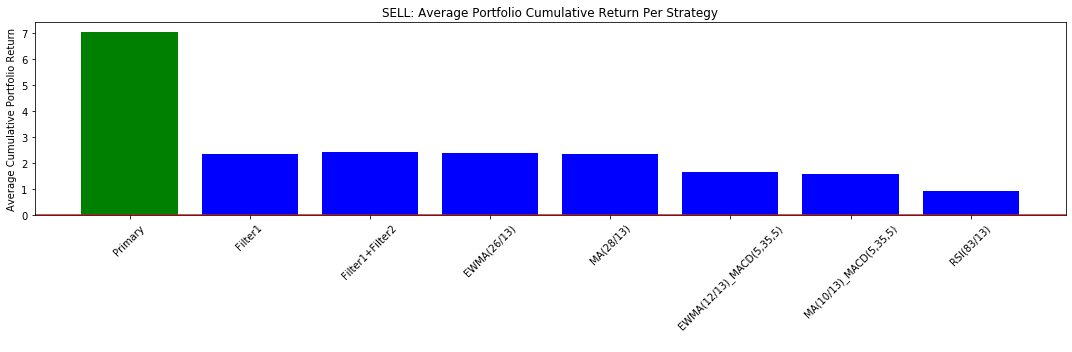

In [15]:
plots(buy, signal_type='sell', stat='cumulative')

From the above plots, we observe a similar pattern here that we found previously with the 'Buy Only' signals. As mentioned previously, instead of just looking at highest average annual return, the counts of filtered signals also matters. 

Although RSI has a very high average annualised return, it has a much lower count of trade signals (which may be due to the long lookback window of about 6.5 days) leading to a lower average cumulative portfolio return relative to other strategies.

## 3. Composite Strategy Recommendations

Based on the highest average annualised return metric, we recommend the following strategies:
- the `MA(10/13) + MACD(5,35,5)` composite strategy for Buy/Long trade signals
- the `RSI(84/13)` composite strategy for Sell/Short trade signals

|Buy only|Sell only|
|-|-|
|MA(10/13)+MACD(5,35,5)|RSI(84/13)|
